Analysis on loan data to determine whether a client would get  a loan or not based on some input variables 

In [1]:
# import relevant libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
loan_data=pd.read_csv("loan_data.csv")
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95,360.0,1.0,Urban,Y


# data cleaning 
1. missing values
2. duplicates
3. data types 
4. data quality 

In [3]:
loan_data.isna().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
# fill the missing values (categorical) with the mode 
categorical_columns=[col for col in loan_data.columns if loan_data[col].dtype=='O']
for col in categorical_columns:
    loan_data[col].fillna(loan_data[col].mode()[0], inplace=True)

In [5]:
loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].median(), inplace=True)
loan_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0], inplace=True)

In [6]:
loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
# check the duplicates
loan_data.duplicated().sum()


0

In [8]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             381 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         381 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      381 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    int64  
 9   Loan_Amount_Term   381 non-null    float64
 10  Credit_History     381 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 38.8+ KB


In [9]:
#handle data type 
loan_data["Dependents"]=loan_data["Dependents"].replace(["0","1","2","3+"],[0,1,2,3])


# data exploration 

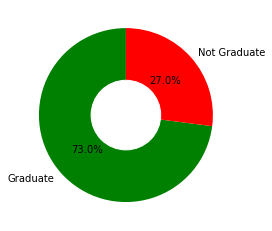

In [10]:
#Distribution of the graduates and none graduates 
ed=loan_data.Education.value_counts()
plt.pie(ed,labels=ed.index,autopct='%1.1f%%',startangle=90, colors=['green','red'])
# Draw a circle at the center to create a donut chart
center_circle = plt.Circle((0, 0), 0.4, color='white')
p=plt.gcf()
p.gca().add_artist(center_circle)
plt.show()

# correlation between variables 


<AxesSubplot:>

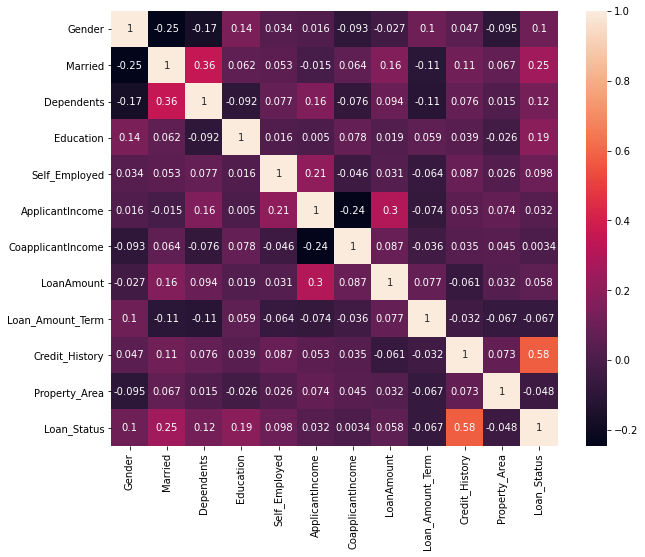

In [25]:
# correlation between the input features 
plt.figure(figsize=(10,8))
corr_data = loan_data.corr()
sns.heatmap(corr_data,annot=True)

In [12]:
#encode the gender,married,education, self_employed and loan status column 
loan_data["Gender"]=np.where(loan_data["Gender"]=='Female',1,0)
loan_data["Married"]=np.where(loan_data["Married"]=='Yes',1,0)
loan_data["Education"]=np.where(loan_data["Education"]=='Graduate',1,0)
loan_data["Self_Employed"]=np.where(loan_data["Self_Employed"]=='Yes',1,0)
loan_data["Loan_Status"]=np.where(loan_data["Loan_Status"]=='Y',1,0)

In [13]:
loan_data["Loan_Status"].value_counts()

1    271
0    110
Name: Loan_Status, dtype: int64

The target seems to be inbalanced, 

In [14]:
# mapping the property area column
loan_data.Property_Area.value_counts()
mapping ={"Semiurban":1,"Urban":2,"Rural":3}
loan_data["Property_Area"]=loan_data["Property_Area"].map(mapping)

In [15]:
#preparing the dependent and independent variables 
x=loan_data.drop(["Loan_ID","Loan_Status"],axis=1)
y=loan_data["Loan_Status"]


In [16]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x,y = smote.fit_resample(x, y)
loan_data= pd.concat([pd.DataFrame(x), pd.DataFrame(y)], axis=1)

In [17]:
#split the data set into training set and test set 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=0)


In [18]:
# import the randomforestclassifier 
from sklearn.ensemble import RandomForestClassifier
cls=RandomForestClassifier()
cls.fit(x_train,y_train)

RandomForestClassifier()

In [19]:
# testing the model 
y_predict=cls.predict(x_test)
y_predict

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0])

In [20]:
# metrics score 
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.8532110091743119

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[50, 13],
       [ 3, 43]], dtype=int64)

In [22]:
cls.feature_importances_

array([0.02415211, 0.04338619, 0.03344733, 0.03517907, 0.01362006,
       0.16438109, 0.09579413, 0.13577099, 0.05312221, 0.35085204,
       0.05029478])

In [23]:
# test the model with the first row of the dataset
print(cls.predict([[1,0,1,0,1,4583,1508.0,128,360.0,1.0,3]]))

[1]


C:\Users\sa\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [24]:
from sklearn.metrics import roc_curve, roc_auc_score